# HSV
HSV is the colorspace commonly recognized as the closest to human vision. In OpenCV terms, it means that, for example,
when using `cv2.inRange` to separate colors,
first carrying your image array into HSV colorspace
will help work better than staying in RGB/BGR colorspace.

To obtain the exact HSV/RGB value of a certain pixel on some image,
one way is to use softwares like GIMP
(I think photoshop is probably the same).

1. Open GIMP and open your image in GIMP
2. Move your cursor to under the targeted pixel
3. On the right panel, it show the RGB/HSV values

In [1]:
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
from colors import (
    display_colors,
    display_gimp_colors,
    gimp2opencv,
)

In [3]:
h_widget = widgets.IntSlider(min=0, max=179, value=100)
s_widget = widgets.IntSlider(min=0, max=255, value=200)
v_widget = widgets.IntSlider(min=0, max=255, value=200)

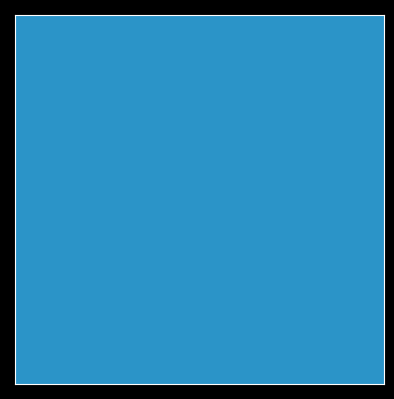

interactive(children=(IntSlider(value=100, description='h', max=179), IntSlider(value=200, description='s', ma…

In [4]:
@interact(h=h_widget, s=s_widget, v=v_widget)
def mydisplay_colors(h,s,v):
    display_colors(h,s,v)

In [5]:
gimp_h_widget = widgets.FloatSlider(min=0, max=360, value=100)
gimp_s_widget = widgets.FloatSlider(min=0, max=100, value=80)
gimp_v_widget = widgets.FloatSlider(min=0, max=100, value=80)

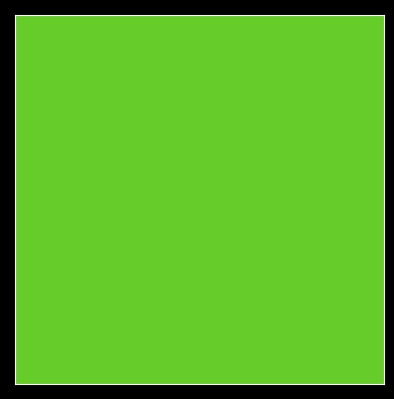

interactive(children=(FloatSlider(value=100.0, description='gimp_h', max=360.0), FloatSlider(value=80.0, descr…

In [6]:
@interact(gimp_h=gimp_h_widget, gimp_s=gimp_s_widget, gimp_v=gimp_v_widget)
def mydisplay_gimp_colors(gimp_h,gimp_s,gimp_v):
    display_gimp_colors(gimp_h,gimp_s,gimp_v)

## `display_colors`
Next, I would like to show the flexibility of the colors
one wants to display with the function `display_colors`.
Essentially, we could specify one or multiple colors.

In [7]:
display_colors?

Signature: display_colors(*colors, colorspace='hsv', show=False)
Docstring:
args
    colors
        should be RGB or HSV values.
        The following formats are accepted:
            display_colors(128,255,255)
            display_colors((128,255,255))
            display_colors(((128,255,255), (0,128,45)))
            display_colors([(128,255,255), (0,128,45)])

    colorspace, str
        either "hsv" or "rgb"
File:      ~/git-repos/github/phunc20/python/cv2/colorspaces/colors.py
Type:      function


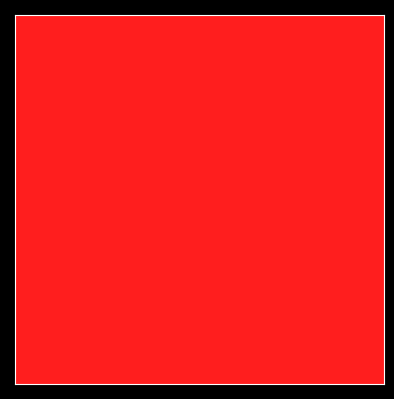

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [8]:
display_colors(255, 30, 30, show=True, colorspace="rgb")

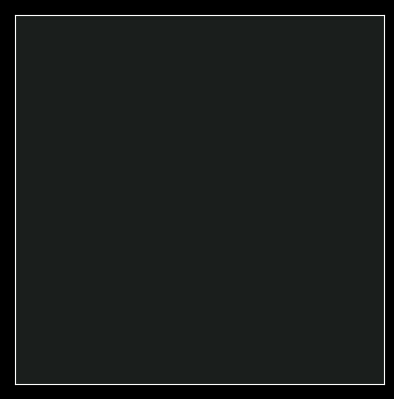

In [9]:
display_colors((255, 30, 30), show=False);

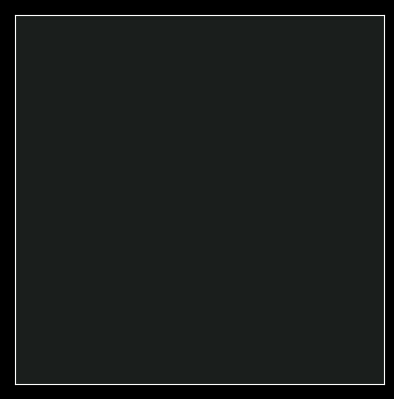

In [10]:
display_colors([(255, 30, 30)], show=False);

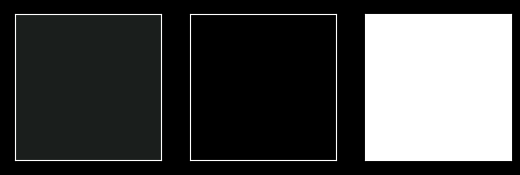

In [11]:
display_colors((255, 30, 30), (0, 255,0), (0,0,255), show=False);

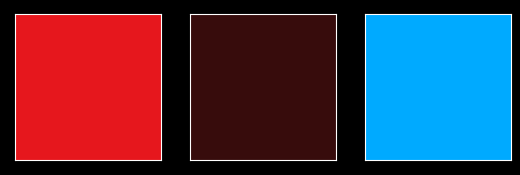

In [12]:
display_colors((179,230,230), (0,200,55), (100,255,255), show=False,
               colorspace="hsv");

In [13]:
colors = [(179,230,230), (0,200,55), (100,255,255)]

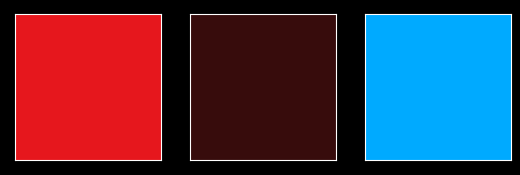

In [14]:
display_colors(colors, show=False, colorspace="hsv");

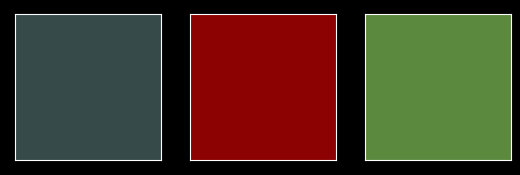

In [15]:
display_gimp_colors(colors, show=False, colorspace="hsv");

Let's make sure colors expressed in NumPy arrays also work.

In [16]:
import numpy as np

In [17]:
colors = np.array([255,0,0], dtype=np.uint8)

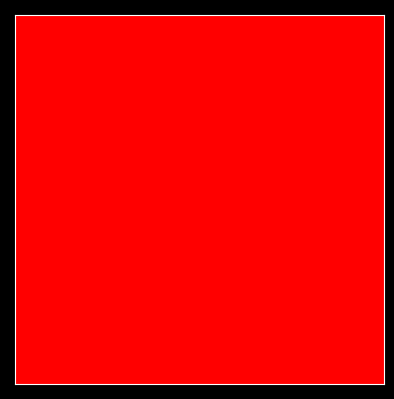

In [18]:
display_colors(colors, show=False, colorspace="rgb");

In [19]:
colors = [
    np.array([255,0,0], dtype=np.uint8),
    np.array([0,255,0], dtype=np.uint8),
    np.array([0,0,255], dtype=np.uint8),
]

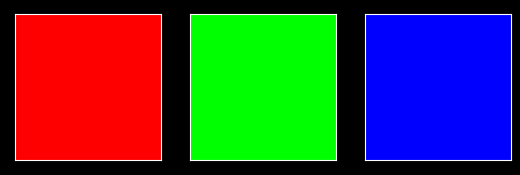

In [20]:
display_colors(colors, show=False, colorspace="rgb");

In [21]:
colors = np.array(
    [[255,0,0],
     [0,255,0],
     [0,0,255],
    ],
    dtype=np.uint8,
)

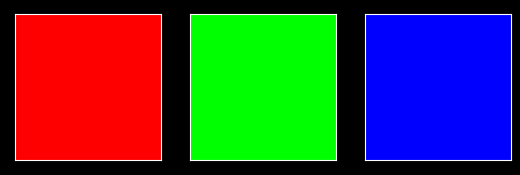

In [22]:
display_colors(colors, show=False, colorspace="rgb");